In [1]:
import pandas as pd

# import 'Numpy'
import numpy as np

# import 'matplotlib.pyplot'
import matplotlib.pyplot as plt

# import 'Seaborn'
import seaborn as sns

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to suppress the notation 'e'    
pd.options.display.float_format = '{:.6f}'.format

# import various metrics from 'Scikit-learn' (sklearn)
from sklearn.model_selection import train_test_split

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
##from statsmodels.tools.eval_measures import rmse
##from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
##from statsmodels.stats.diagnostic import linear_rainbow
##import statsmodels.tsa.api as smt
##from statsmodels.graphics.gofplots import qqplot
##from statsmodels.stats.stattools import durbin_watson

# 'SciPy' is used to perform scientific computations
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('car_sales.csv')
df.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.900000,15.900000,18.800000,25,31,None,Front,4,1.800000,140,6300,2890,Yes,13.200000,5,177,102,68,37,26.500000,11.000000,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.200000,33.900000,38.700000,18,25,Driver & Passenger,Front,6,3.200000,200,5500,2335,Yes,18.000000,5,195,115,71,38,30.000000,15.000000,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.900000,29.100000,32.300000,20,26,Driver only,Front,6,2.800000,172,5500,2280,Yes,16.900000,5,180,102,67,37,28.000000,14.000000,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.800000,37.700000,44.600000,19,26,Driver & Passenger,Front,6,2.800000,172,5500,2535,Yes,21.100000,6,193,106,70,37,31.000000,17.000000,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.700000,30.000000,36.200000,22,30,Driver only,Rear,4,3.500000,208,5700,2545,Yes,21.100000,4,186,109,69,39,27.000000,13.000000,3640,non-USA,BMW 535i


In [3]:
df1= df.drop('Unnamed: 0', axis=1).copy()

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

<AxesSubplot:>

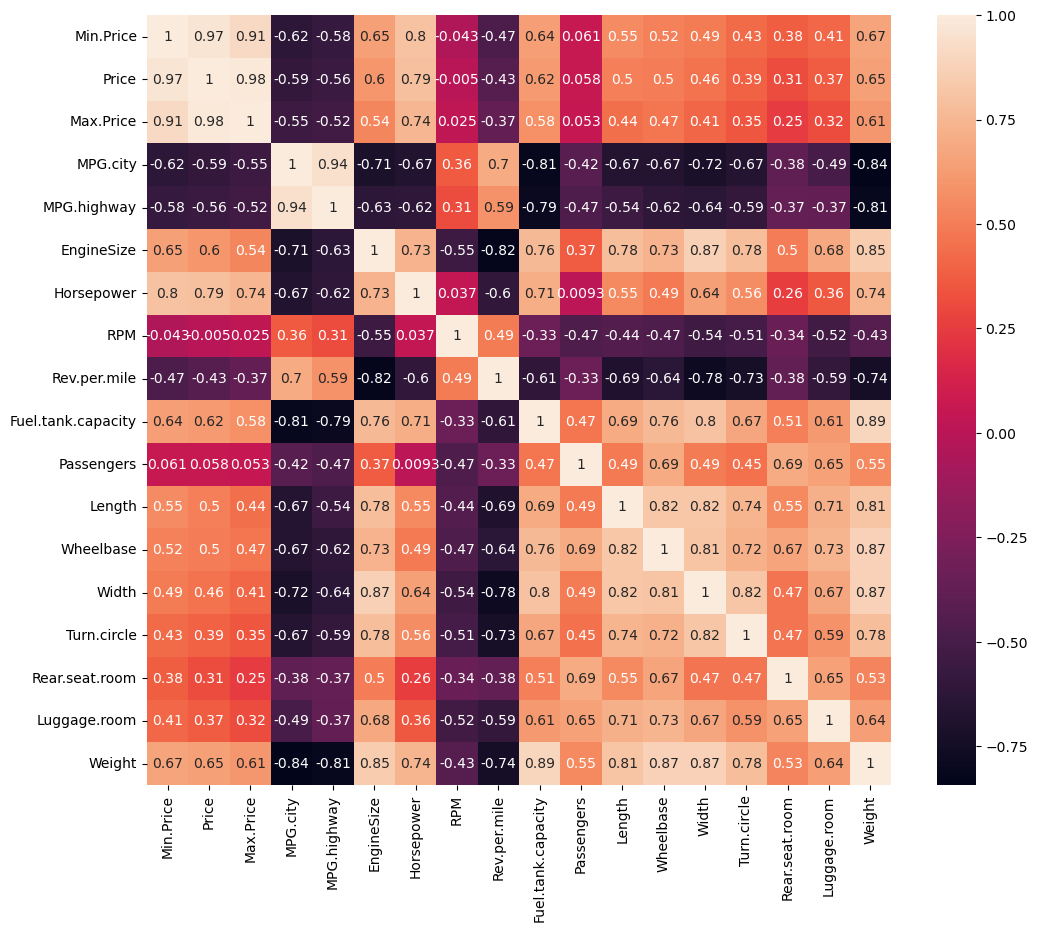

In [5]:
plt.figure(figsize=(12,10))
sns.heatmap(df1.corr(), annot=True)

In [6]:
vif_values = [VIF(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame(vif_values, columns=['VIF_Value'], index=Xc.columns).sort_values('VIF_Value', ascending=False)

NameError: name 'Xc' is not defined

In [ ]:
Xc = Xc.drop('Weight', axis=1)
vif_values = [VIF(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame(vif_values, columns=['VIF_Value'], index=Xc.columns).sort_values('VIF_Value', ascending=False)

In [ ]:
Xc = Xc.drop('MPG.city', axis=1)
vif_values = [VIF(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame(vif_values, columns=['VIF_Value'], index=Xc.columns).sort_values('VIF_Value', ascending=False)

In [ ]:
Xc = Xc.drop('Horsepower', axis=1)
vif_values = [VIF(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame(vif_values, columns=['VIF_Value'], index=Xc.columns).sort_values('VIF_Value', ascending=False)

In [ ]:
Xc = Xc.drop('Min.Price', axis=1)
vif_values = [VIF(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame(vif_values, columns=['VIF_Value'], index=Xc.columns).sort_values('VIF_Value', ascending=False)

In [ ]:
Xc = Xc.drop('Width', axis=1)
vif_values = [VIF(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame(vif_values, columns=['VIF_Value'], index=Xc.columns).sort_values('VIF_Value', ascending=False)

In [ ]:
Xc = Xc.drop('EngineSize', axis=1)
vif_values = [VIF(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame(vif_values, columns=['VIF_Value'], index=Xc.columns).sort_values('VIF_Value', ascending=False)

In [ ]:
Xc = Xc.drop('Wheelbase', axis=1)
vif_values = [VIF(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame(vif_values, columns=['VIF_Value'], index=Xc.columns).sort_values('VIF_Value', ascending=False)

In [ ]:
Xc.columns

In [ ]:
new_model = sm.OLS(y, Xc).fit()
new_model.summary()

In [ ]:
sns.scatterplot(new_model.fittedvalues, new_model.resid)

In [ ]:
y.describe()

In [ ]:
y_log = np.log(y) 

In [ ]:
log_model = sm.OLS(y_log, Xc).fit()
log_model.summary()

In [ ]:
sns.scatterplot(log_model.fittedvalues, log_model.resid)

In [ ]:
# Since value of Durbin Watson test is 1.7, hence no autocorr.
import scipy

In [ ]:
from statsmodels.stats.api import het_breuschpagan
het_breuschpagan(log_model.resid, Xc)[2:]

In [ ]:
# Thre resid are hetroscedacsticity

In [ ]:
sns.distplot(log_model.resid, kde=True)

In [ ]:
from statsmodels.stats.api import jarque_bera
# H0: Data is normal
test_stat, p_value, res_skew, res_kurt = jarque_bera(log_model.resid)
p_value
# Since p_value is low , hence reject H0 i.e. residuals are not normal.

In [ ]:
X = Xc.drop('const', axis=1)
X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
mean_squared_error(y_test, lr.predict(X_test))**0.5

# Feature selection

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [ ]:
lr_sfs = sfs(estimator=lr, k_features='best', forward=True)
sfs_fwd = lr_sfs.fit(X_train, y_train)
fwd_features = list(sfs_fwd.k_feature_names_)
fwd_features

In [ ]:
lr_sfs = sfs(estimator=lr, k_features='best', forward=False)
sfs_bwd = lr_sfs.fit(X_train, y_train)
bwd_features = list(sfs_bwd.k_feature_names_)
bwd_features

In [ ]:
lr = LinearRegression()
lr.fit(X_train[fwd_features], y_train)
mean_squared_error(y_test, lr.predict(X_test[fwd_features]))**0.5

In [114]:
from sklearn.feature_selection import RFE

In [115]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_rfe = RFE(estimator=lr, n_features_to_select=5)
rfe_model = lr_rfe.fit(X_train, y_train)
rfe_model.ranking_

array([1, 1, 5, 4, 2, 1, 1, 3, 1, 6])

In [116]:
rfe_rank = pd.DataFrame()
rfe_rank['rank'] = rfe_model.ranking_
rfe_rank['features'] = X_train.columns
rfe_list = list(rfe_rank[rfe_rank['rank']==1]['features'])
rfe_list

['Max.Price', 'MPG.highway', 'Passengers', 'Length', 'Rear.seat.room']

In [117]:
lr.fit(X_train[rfe_list], y_train)
mean_squared_error(y_test, lr.predict(X_test[rfe_list]))**0.5

1.6725095870869457

# Regularization

In [118]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [121]:
ridge_model = Ridge(alpha=15)
ridge_model.fit(X_train, y_train)

y_pred_train = ridge_model.predict(X_train)
y_pred_test = ridge_model.predict(X_test)

train_rmse = mean_squared_error(y_train, y_pred_train)**0.5
test_rmse = mean_squared_error(y_test, y_pred_test)**0.5

print('Train R2', train_rmse)
print('Test R2', test_rmse)

Train R2 2.113798214556774
Test R2 1.8964787866818877


In [122]:
ridge_model = Ridge(alpha=20)
ridge_model.fit(X_train, y_train)

y_pred_train = ridge_model.predict(X_train)
y_pred_test = ridge_model.predict(X_test)

train_rmse = mean_squared_error(y_train, y_pred_train)**0.5
test_rmse = mean_squared_error(y_test, y_pred_test)**0.5

print('Train R2', train_rmse)
print('Test R2', test_rmse)

Train R2 2.404809668429077
Test R2 2.018717880528523


In [124]:
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train, y_train)
y_pred_train = lasso_model.predict(X_train)
y_pred_test = lasso_model.predict(X_test)
train_rmse = mean_squared_error(y_train, y_pred_train)**0.5
test_rmse = mean_squared_error(y_test, y_pred_test)**0.5

print('Train R2', train_rmse)
print('Test R2', test_rmse)

Train R2 1.9243034982116034
Test R2 2.070726480250555


In [125]:
en_model = ElasticNet(alpha=1, l1_ratio=0.5)
en_model.fit(X_train, y_train)


y_pred_train = en_model.predict(X_train)
y_pred_test = en_model.predict(X_test)

train_rmse = mean_squared_error(y_train, y_pred_train)
test_rmse = mean_squared_error(y_test, y_pred_test)

print('Train R2', train_rmse)
print('Test R2', test_rmse)

Train R2 12.351246599816513
Test R2 9.10904634484442


In [127]:
from sklearn.model_selection import GridSearchCV

In [128]:
param = {'alpha':[0.0,0.1,1,10]}

model = Ridge()

grid_cv = GridSearchCV(estimator=model, param_grid=param, cv=5, scoring='r2')

grid_cv.fit(X_train, y_train)
grid_cv.best_params_

{'alpha': 1}